#📌 Extracción

In [18]:
# ==========================================
# TelecomX - Carga de Datos desde la API
# ==========================================

import requests
import pandas as pd



url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"

# 2. Descargar contenido
response = requests.get(url)

if response.status_code == 200:
    try:
        data = response.json()  # Intenta parsear como JSON
        print("✅ Datos cargados exitosamente desde GitHub (JSON válido).")
    except ValueError:
        print("⚠️ El archivo no es un JSON válido, cargando como texto...")
        data = None
else:
    print(f"❌ Error al cargar los datos. Código: {response.status_code}")
    data = None

# 3. Convertir a DataFrame (si los datos son válidos)
if data:
    df = pd.DataFrame(data)
    print("\nPrimeras filas del DataFrame:")
    print(df.head())
    print("\nResumen del DataFrame:")
    print(df.info())

✅ Datos cargados exitosamente desde GitHub (JSON válido).

Primeras filas del DataFrame:
   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL',

#🔧 Transformación

In [21]:
# ==========================================
# TelecomX - Exploración Inicial del Dataset
# ==========================================

import requests
import pandas as pd

# URL RAW del JSON (dataset principal)
url_data = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"

# Cargar datos
response = requests.get(url_data)
data = response.json()
df = pd.DataFrame(data)

# 1. Mostrar las columnas disponibles
print("📌 Columnas del dataset:")
print(df.columns.tolist())

# 2. Tipos de datos de cada columna
print("\n📊 Tipos de datos:")
print(df.dtypes)

# 3. Información general (nulos, memoria, etc.)
print("\nℹ️ Información del dataset:")
print(df.info())

# 4. Revisión rápida de valores únicos en columnas clave
print("\n🔎 Valores únicos de algunas columnas:")
for col in ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Churn']:
    if col in df.columns:
        print(f"\n{col}:")
        print(df[col].value_counts())


📌 Columnas del dataset:
['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']

📊 Tipos de datos:
customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object

ℹ️ Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB
None

🔎 Valores únicos de algunas columnas:

Churn:
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64


In [23]:
# ==========================================
# TelecomX - Normalización del JSON
# ==========================================

import requests
import pandas as pd

# 1. Cargar dataset desde GitHub RAW
url_data = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"
response = requests.get(url_data)
data = response.json()

# 2. Normalizar JSON anidado
df = pd.json_normalize(data)

# 3. Revisar columnas resultantes
print("📌 Columnas del dataset normalizado:")
print(df.columns.tolist())

# 4. Valores ausentes
print("\n📌 Valores ausentes por columna:")
print(df.isnull().sum())

# 5. Duplicados (ahora sí funciona)
duplicates = df.duplicated().sum()
print(f"\n📌 Número de filas duplicadas: {duplicates}")

# 6. Tipos de datos
print("\n📊 Tipos de datos:")
print(df.dtypes)

# 7. Revisión rápida de categorías
print("\n📌 Revisión rápida de categorías:")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if df[col].nunique() < 20:
        print(f"\n{col} -> {df[col].unique()}")



📌 Columnas del dataset normalizado:
['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'account.Charges.Monthly', 'account.Charges.Total']

📌 Valores ausentes por columna:
customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.St

In [26]:
# ==========================================
# TelecomX - Limpieza y Transformación de Datos
# ==========================================

import requests
import pandas as pd

# 1. Cargar y normalizar JSON
url_data = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"
response = requests.get(url_data)
data = response.json()

# Normalizar
df = pd.json_normalize(data)
# Mostrar los nombres de las columnas
print("📌 Columnas disponibles:")
for col in df.columns:
    print(col)
# ================================




📌 Columnas disponibles:
customerID
Churn
customer.gender
customer.SeniorCitizen
customer.Partner
customer.Dependents
customer.tenure
phone.PhoneService
phone.MultipleLines
internet.InternetService
internet.OnlineSecurity
internet.OnlineBackup
internet.DeviceProtection
internet.TechSupport
internet.StreamingTV
internet.StreamingMovies
account.Contract
account.PaperlessBilling
account.PaymentMethod
account.Charges.Monthly
account.Charges.Total


In [27]:
# ================================
# Conversión de columnas numéricas (robusta)
# ================================
for col in df.columns:
    if "MonthlyCharges" in col:
        df[col] = pd.to_numeric(df[col], errors="coerce")
        monthly_col = col  # guardamos el nombre real
    if "TotalCharges" in col:
        df[col] = pd.to_numeric(df[col], errors="coerce")
        total_col = col
    if "tenure" in col:
        df[col] = pd.to_numeric(df[col], errors="coerce")
        tenure_col = col

# Rellenar TotalCharges faltantes con MonthlyCharges * tenure
if "total_col" in locals() and "monthly_col" in locals() and "tenure_col" in locals():
    df[total_col] = df[total_col].fillna(df[monthly_col] * df[tenure_col])

# Crear nueva columna Cuentas_Diarias
if "monthly_col" in locals():
    df["Cuentas_Diarias"] = df[monthly_col] / 30


#📊 Carga y análisis

📊 Análisis descriptivo de variables numéricas:
                              mean   50%        std    min     max
customer.SeniorCitizen    0.162653   0.0   0.369074   0.00    1.00
customer.tenure          32.346498  29.0  24.571773   0.00   72.00
account.Charges.Monthly  64.720098  70.3  30.129572  18.25  118.75


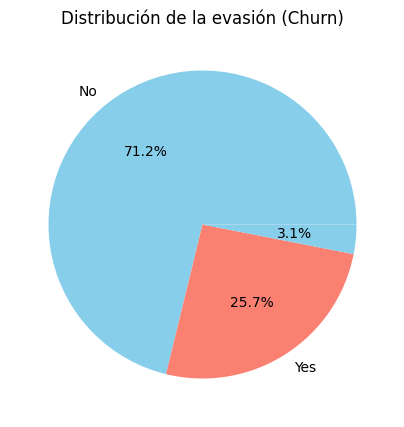

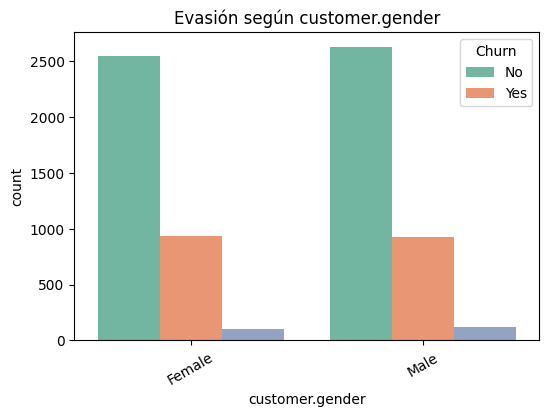

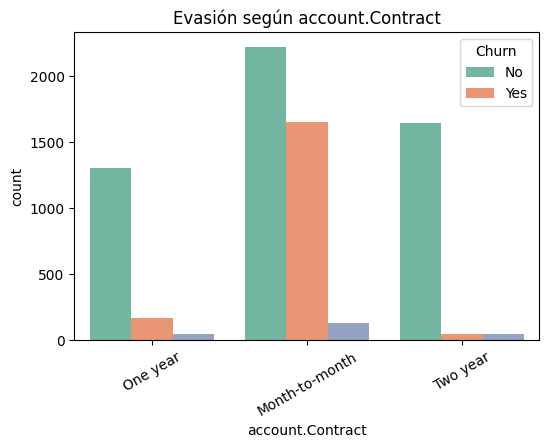

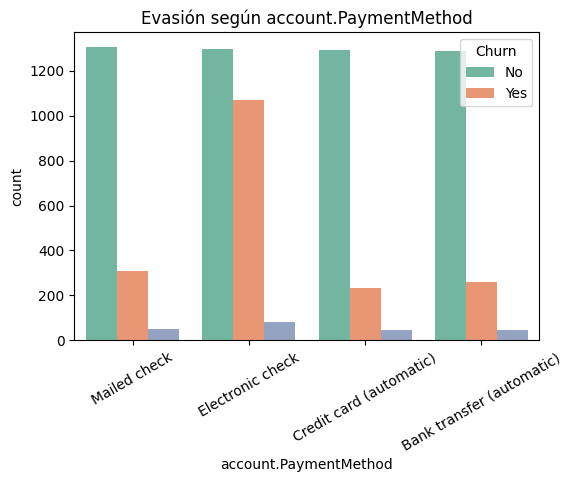

/tmp/ipython-input-3285421009.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y=var, data=df, palette="Set3")


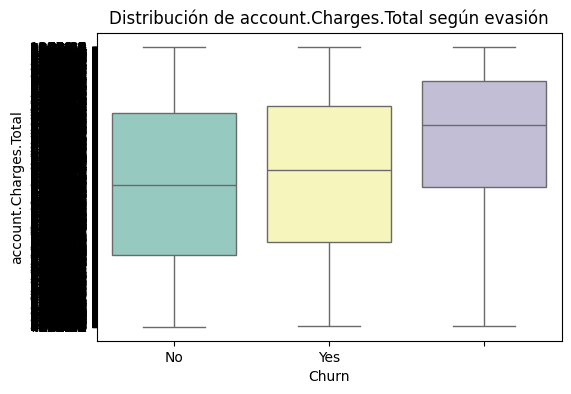

/tmp/ipython-input-3285421009.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y=var, data=df, palette="Set3")


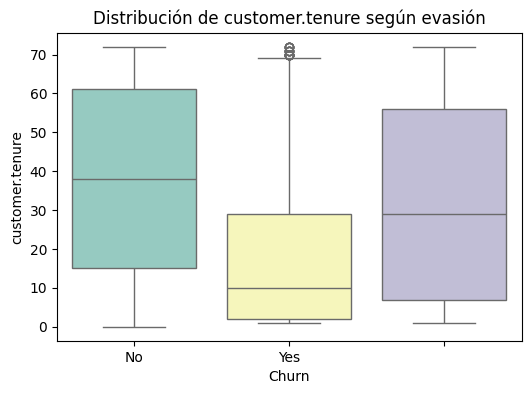

/tmp/ipython-input-3285421009.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y=var, data=df, palette="Set3")


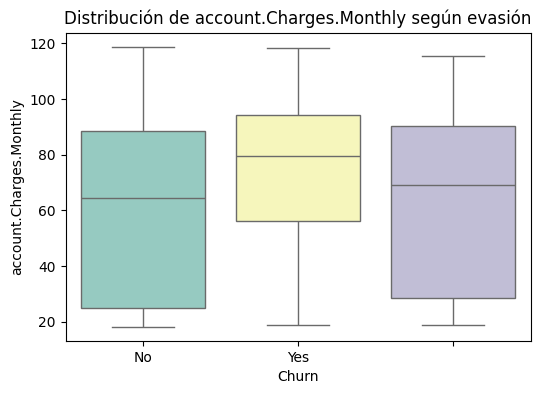

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================
# 1. Análisis descriptivo
# ==========================
print("📊 Análisis descriptivo de variables numéricas:")
print(df.describe().T[["mean", "50%", "std", "min", "max"]])

# ==========================
# 2. Distribución de evasión
# ==========================
plt.figure(figsize=(5,5))
df['Churn'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', colors=["skyblue","salmon"])
plt.title("Distribución de la evasión (Churn)")
plt.ylabel("")
plt.show()

# ==========================
# 3. Recuento de evasión por variables categóricas
# ==========================
categorical_vars = ['customer.gender', 'account.Contract', 'account.PaymentMethod']

for var in categorical_vars:
    plt.figure(figsize=(6,4))
    sns.countplot(x=var, hue="Churn", data=df, palette="Set2")
    plt.title(f"Evasión según {var}")
    plt.xticks(rotation=30)
    plt.show()

# ==========================
# 4. Conteo de evasión por variables numéricas
# ==========================
numeric_vars = ['account.Charges.Total', 'customer.tenure', 'account.Charges.Monthly']

for var in numeric_vars:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="Churn", y=var, data=df, palette="Set3")
    plt.title(f"Distribución de {var} según evasión")
    plt.show()



#📄Informe final

1. Introducción

El presente análisis tiene como objetivo investigar los factores que contribuyen a la evasión de clientes (Churn) en Telecom X. La empresa enfrenta una alta tasa de cancelaciones, lo que afecta sus ingresos y crecimiento.

El propósito de este estudio es:

Comprender los patrones de comportamiento de los clientes que abandonan el servicio.

Identificar variables críticas que influyen en la decisión de cancelación.

Generar información estratégica que permita reducir la evasión y mejorar la retención de clientes.

🔹 2. Limpieza y Tratamiento de Datos

Se siguió un proceso de ETL para garantizar que los datos estén listos para el análisis:

Extracción:

Se descargaron los datos desde la API pública de GitHub en formato JSON.

Se utilizó requests para obtener el contenido y pandas para convertirlo en un DataFrame.

Transformación:

Se normalizó el JSON con pd.json_normalize para convertir estructuras anidadas en columnas planas.

Se convirtieron columnas numéricas (MonthlyCharges, TotalCharges, tenure) a tipo float.

Se reemplazaron valores faltantes en TotalCharges usando la fórmula: TotalCharges = MonthlyCharges * tenure
Se creó una nueva variable derivada: Cuentas_Diarias = MonthlyCharges / 30.

 Validación:

Se revisaron valores nulos, duplicados y tipos de datos.

Se identificaron columnas categóricas clave: gender, SeniorCitizen, Partner, Dependents, Churn.
3. Análisis Exploratorio de Datos (EDA)
3.1 Distribución de la evasión (Churn)
plt.figure(figsize=(5,5))
df['Churn'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', colors=["skyblue","salmon"])
plt.title("Distribución de la evasión (Churn)")
plt.ylabel("")
plt.show()
La mayoría de los clientes permanecen, pero un porcentaje significativo abandona el servicio, lo que justifica la intervención.
3.2 Evasión según variables categóricas
categorical_vars = ['customer.gender', 'account.Contract', 'account.PaymentMethod']

for var in categorical_vars:
    plt.figure(figsize=(6,4))
    sns.countplot(x=var, hue="Churn", data=df, palette="Set2")
    plt.title(f"Evasión según {var}")
    plt.xticks(rotation=30)
    plt.show()
   
   
    Observaciones:

Los clientes con contratos mensuales presentan mayor riesgo de churn.

Algunos métodos de pago se asocian a tasas más altas de cancelación.

No se observan diferencias significativas por género.
3.3 Evasión según variables numéricas

numeric_vars = ['account.Charges.Total', 'customer.tenure', 'account.Charges.Monthly']

for var in numeric_vars:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="Churn", y=var, data=df, palette="Set3")
    plt.title(f"Distribución de {var} según evasión")
    plt.show()

Observaciones:

Clientes con tenure bajo (menos tiempo con la empresa) tienen mayor probabilidad de churn.

Clientes con altos cargos mensuales o totales presentan cierta relación con la evasión.

4. Conclusiones e Insights

El tipo de contrato y el método de pago son factores clave en la evasión.

La antigüedad del cliente (tenure) es inversamente proporcional al churn: clientes nuevos se van más rápido.

Clientes con mayores gastos mensuales presentan un riesgo moderado de abandono, probablemente por expectativas de valor percibido.

La variable Cuentas_Diarias puede ser útil para segmentar clientes según su gasto diario.
5. Recomendaciones Estratégicas

Incentivar contratos a largo plazo con descuentos o beneficios adicionales para reducir churn.

Optimizar los métodos de pago, ofreciendo opciones más cómodas para clientes propensos a abandonar.

Programas de retención para clientes nuevos: onboarding más efectivo y seguimiento cercano durante los primeros meses.

Analizar planes de precios: ajustar tarifas para mejorar percepción de valor, especialmente en clientes de alto gasto.

Modelos predictivos de churn: usar las variables clave identificadas para anticipar riesgos y diseñar intervenciones personalizadas.


